In [1]:
!pip install -Uqq fastbook

     |████████████████████████████████| 727kB 4.0MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 1.2MB 22.9MB/s 
     |████████████████████████████████| 194kB 34.8MB/s 
     |████████████████████████████████| 61kB 9.7MB/s 
     |████████████████████████████████| 61kB 9.5MB/s 


In [2]:
import fastai 
from fastai.vision.all import * 

In [3]:
path = untar_data(URLs.CAMVID_TINY)

In [4]:
# dataloaders  
dls = SegmentationDataLoaders.from_label_func(
    path, bs = 8 , fnames = get_image_files(path/'images'),
    label_func = lambda o : path/'labels'/f'{o.stem}_P{o.suffix}',codes = np.loadtxt(path/'codes.txt', dtype=str)
)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


In [5]:
learn = unet_learner(dls ,resnet34,n_out=None)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [6]:
learn.fine_tune(12)

epoch,train_loss,valid_loss,time
0,2.916123,2.352565,00:02


epoch,train_loss,valid_loss,time
0,1.708696,1.537819,00:01
1,1.497152,1.431628,00:01
2,1.373819,1.494613,00:01
3,1.311344,1.272197,00:01
4,1.244116,1.084261,00:01
5,1.141722,0.952527,00:01
6,1.039779,0.938780,00:01
7,0.948045,0.878398,00:01
8,0.868511,0.840310,00:01
9,0.802026,0.875832,00:01


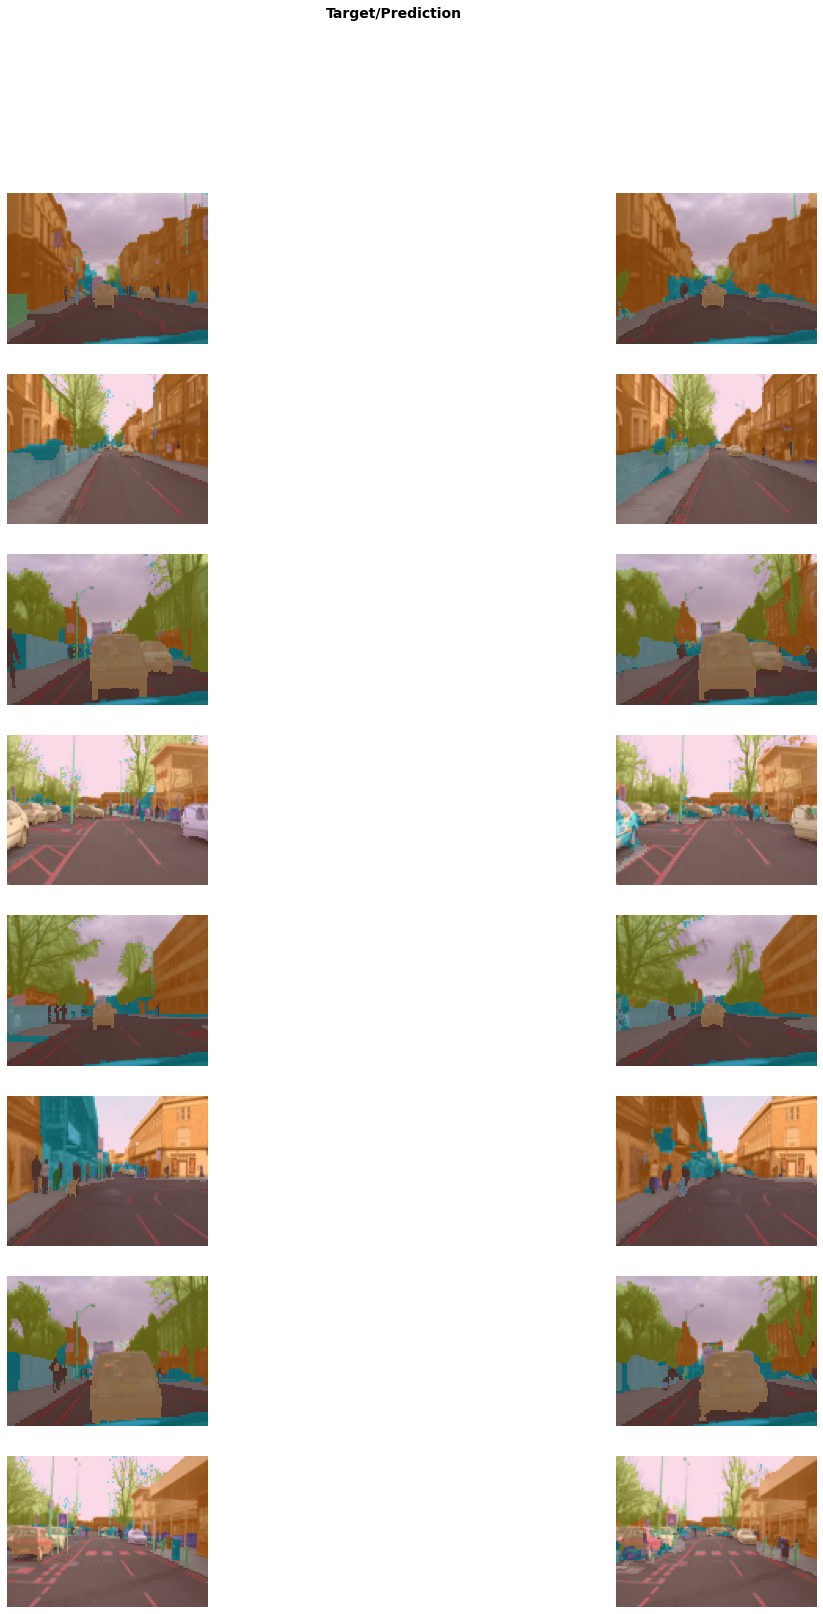

In [51]:
learn.show_results(max_n = 9 ,figsize = (20,26))

In [9]:
from fastai.text.all import * 

In [10]:
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB),valid = 'test')


In [13]:
classiffier = text_classifier_learner(dls, AWD_LSTM, drop_mult = 0.5, metrics = accuracy)

In [14]:
classiffier.fine_tune(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.461477,0.397020,0.822520,02:16


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time
0,0.313051,0.291401,0.876920,04:15
1,0.244932,0.209857,0.918600,04:16
2,0.198248,0.202801,0.922320,04:16
3,0.153579,0.187316,0.928720,04:15
4,0.111945,0.204115,0.928440,04:15


In [15]:
doc(TextDataLoaders.from_folder)

In [19]:
classiffier.predict('this movie is freaking boring')

('neg', tensor(0), tensor([0.6141, 0.3859]))